In [1]:
# Bibliotecas necessárias para o experimento

import numpy as np
import matplotlib.pyplot as plt
from random import randint
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def S(Ut, Uf, X):
    W = np.dot(np.transpose(Uf), Ut)
    T = np.transpose(W)
    A = np.dot(np.transpose(Ut), np.transpose(X))
    C = np.dot(A, Uf)
    L = W - np.identity(3) - 1/2*(W - np.identity(3))**2
    S = 2*np.trace(np.dot((-np.dot(T, C) + 2*C),L))
    #S = 2*np.trace(np.dot((-1/2*np.dot(C, T) - 1/2*np.dot(T, C) + 2*C),L))
    return S

In [3]:
def field(Ut, Uf, a, h, A, B):
    SA = S(Ut, Uf, A)
    SB = S(Ut, Uf, B)
    f = -a*SA-h*(SB/SA)
    return f

In [4]:
def lind(u, Ut, Uf, t, lbda):
    Ax = [[0, 0, 0],[0, 0, -1], [0, 1, 0]]
    Ay = [[0, 0, 1],[0, 0, 0], [-1, 0, 0]]
    Az = [[0, -1, 0],[1, 0, 0], [0, 0, 0]]
    B = [[-0.001*lbda, 0, 0],[0, -0.001*lbda, 0], [0, 0, -1.001*lbda]] # Amplitude Damping
    #B = [[-1.01*lbda, 0, 0],[0, -1.01*lbda, 0], [0, 0, -0.01*lbda]] # Phase Damping
    if t == 0:
        fx=10.28
        fy=10.73
        fz=40
        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
    else:
        fx=field(Ut, Uf, u[0], u[3], Ax, B)
        fy=field(Ut, Uf, u[1], u[4], Ay, B)
        fz=field(Ut, Uf, u[2], u[5], Az, B)
        P=400

        if abs(fx) > P:
            if fx < 0:
                fx = -P
            else:
                fx = P
        if abs(fy) > P:
            if fy < 0:
                fy = -P
            else:
                fy = P
        if abs(fz) > P:
            if fz < 0:
                fz = -P
            else:
                fz = P

        F=np.dot(fx,Ax)+np.dot(fy,Ay)+np.dot(fz,Az)+B
        	
    return fx,fy,fz,F

In [5]:
def rungeKutta(u, Ut, Uf, h, t, lbda):
    fx,fy,fz,k1 = lind(u, Ut, Uf, t, lbda)
    k1 = np.dot(k1,Ut)
    fx,fy,fz,k2 = lind(u, (Ut+h/2*k1), Uf, t+h/2, lbda)
    k2 = np.dot(k2,(Ut+h/2*k1))
    fx,fy,fz,k3 = lind(u, (Ut+h/2*k2), Uf, t+h/2, lbda)
    k3 = np.dot(k3,(Ut+h/2*k2))
    fx,fy,fz,k4 = lind(u, (Ut+h*k3), Uf, t+h, lbda)
    k4 = np.dot(k4,(Ut+h*k3))
    a = fx;
    b = fy;
    c = fz;
    result = Ut+(h/6)*(k1+2*k2+2*k3+k4);
    return a,b,c,result

In [6]:
def leis_controle(fx, fy, fz, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    plt.ylabel("Valores das leis de controle") 
    plt.xlabel('Tempo (u. a.)') 
    plt.plot(ts, fx, color='g', marker='o', linewidth=1, markersize=1, label="$f_x(t)$")
    plt.plot(ts, fy, color='b', marker='_', linewidth=1, markersize=1, label="$f_y(t)$")
    plt.plot(ts, fz, color='r', marker='.', linewidth=1, markersize=1, label="$f_z(t)$")
    plt.legend(loc="upper right")
    plt.title(fr"Leis de controle para $\gamma = {lbda}$")
    plt.show()

In [7]:
def fidelidade(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de fidelidade") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Fidelidade com $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.indicate_inset_zoom(axins)
    
    plt.show()

In [8]:
def distance(fid, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel("Valores de distância") 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Distância entre os operadores de evolução com $\gamma = {lbda}$")

    #x1, x2, y1, y2 = 2.5, 4, 0, max(np.abs(fid))
    #axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    #axins.set_xlim(0.009, 0.020)
    #axins.set_ylim(0.98, 1)

    #axins.plot(ts, np.abs(fid), color='g', marker='*', linewidth=1, markersize=1, label=fr"$\gamma = {lbda}$")
    #ax.indicate_inset_zoom(axins)
    
    plt.show()

In [9]:
def densidade(rho, quant_pontos, lbda):
    ts = np.linspace(0, 0.1, quant_pontos)

    fig, ax = plt.subplots()

    ax.set_ylabel('Valores da matriz de densidade') 
    ax.set_xlabel('Tempo (u. a.)') 
    ax.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    ax.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    ax.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    ax.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")
    ax.legend(loc="center right")
    ax.set_title(fr"Evolução da matriz de densidade $\gamma = {lbda}$")

    x1, x2, y1, y2 = 2.5, 4, 0, max(max(abs(rho[0])), max(abs(rho[1])), max(abs(rho[2])), max(abs(rho[3])))
    axins = inset_axes(ax, width="30%", height="30%", loc='upper center', borderpad=3)
    axins.set_xlim(0.009, 0.020)
    axins.set_ylim(0.98, 1)

    axins.plot(ts, abs(rho[0]), color='g', marker='o', linewidth=1, markersize=1, label=r"$\rho_{00}$")
    axins.plot(ts, abs(rho[1]), color='b', marker='8', linewidth=1, markersize=1, label=r"$\rho_{01}$")
    axins.plot(ts, abs(rho[2]), color='r', marker='.', linewidth=1, markersize=1, label=r"$\rho_{10}$")
    axins.plot(ts, abs(rho[3]), color='y', marker='*', linewidth=1, markersize=1, label=r"$\rho_{11}$")

    ax.indicate_inset_zoom(axins)
    
    plt.show()

############ Informações finais do experimento ############

O rf desejado é:
 [[-1]
 [ 0]
 [ 0]]
O rho desejado é: [[0.5, (-0.5+0j)], [(-0.5+0j), 0.5]]
O vetor de Bloch encontrado é:
 [[-1.00144688]
 [ 0.00131077]
 [-0.00770422]]
O rho alcançado foi:
 [[0.4961478876310103, (-0.5007234388855255-0.0006553865831796204j)], [(-0.5007234388855255+0.0006553865831796204j), 0.5038521123689897]]
A fidelidade do experimento é de: (0.9999925804775258+0j)
A fidelidade do experimento é de (fórmula dos autores do artigo): 0.9995263009888231
O vetor U alcançado foi:
 [[-1.00144688 -0.00146019  0.00967051]
 [ 0.00131077  0.99896738  0.0016219 ]
 [-0.00770422 -0.0018288  -0.99885423]]
A distância encontrada, ao final do experimento foi: 0.00016717173754967154

############ Informações gráficas obtidas com o experimento ############



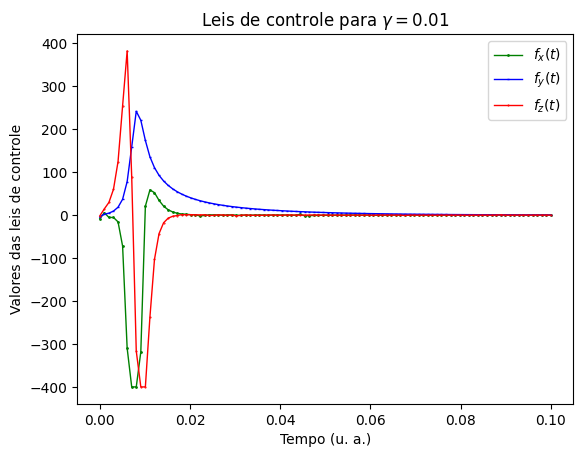

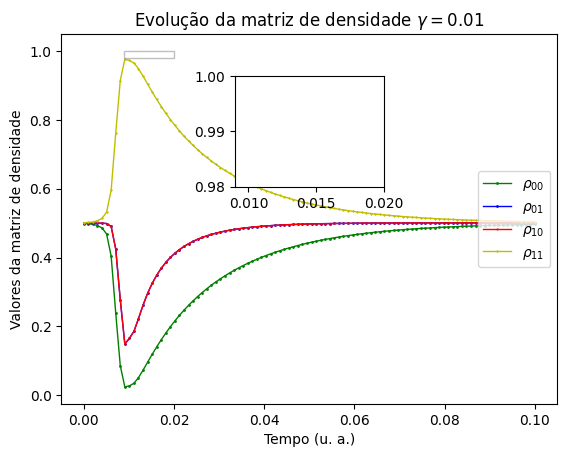

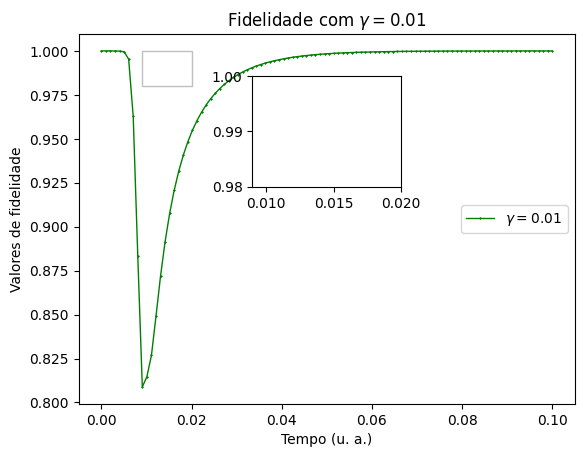

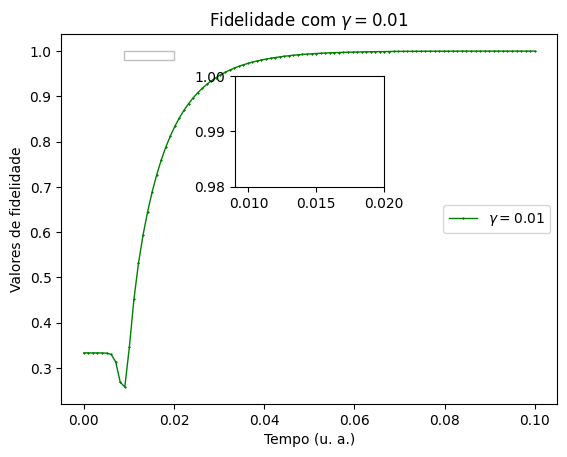

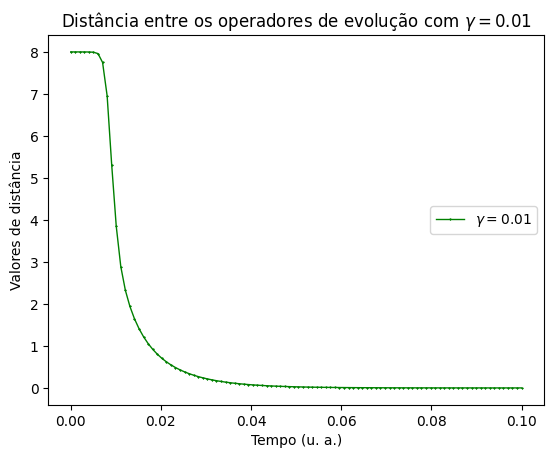

In [10]:
u = [102, 13, 84, 0.35, 0.31, 0.34]

Ut = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
Uf = [[-1, 0, 0], [0, 1, 0], [0, 0, -1]]

print(f"############ Informações finais do experimento ############\n")

r0 = [[1], [0], [0]]
rf = np.dot(Uf, r0)
print(f'O rf desejado é:\n {rf}')
pf = [[1/2*(1+rf[2][0]), 1/2*(rf[0][0]-1j*rf[1][0])], [1/2*(rf[0][0]+1j*rf[1][0]), 1/2*(1-rf[2][0])]]
print(f'O rho desejado é: {pf}')

h=0.001
t=0
i=0
lbda=0.01
distance_vector = []
fx_vector = []
fy_vector = []
fz_vector = []
rho_vector = np.zeros((4,100),dtype=np.complex128)
fid_vector = []
fid_autores = []
   
while t < 100:
    a,b,c,Ut = rungeKutta(u, Ut, Uf, h, t, lbda)
    D = np.linalg.norm(Ut-Uf)**2
    distance_vector.append(D)
    fx_vector.append(a)
    fy_vector.append(b)
    fz_vector.append(c)
    rt = np.dot(Ut, r0)
    pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
    rho_vector[0][t] = pt[0][0]
    rho_vector[1][t] = pt[0][1]
    rho_vector[2][t] = pt[1][0]
    rho_vector[3][t] = pt[1][1]
    fid_vector.append(np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt))))
    fid_autores.append((np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1)))
    t += 1

rt = np.dot(Ut, r0)
print(f'O vetor de Bloch encontrado é:\n {rt}')
pt = [[1/2*(1+rt[2][0]), 1/2*(rt[0][0]-1j*rt[1][0])], [1/2*(rt[0][0]+1j*rt[1][0]), 1/2*(1-rt[2][0])]]
print(f'O rho alcançado foi:\n {pt}')
print(f'A fidelidade do experimento é de: {np.trace(np.sqrt(np.sqrt(pt)*pf*np.sqrt(pt)))}')
print(f'A fidelidade do experimento é de (fórmula dos autores do artigo): {(np.trace(np.dot(Ut, np.transpose(Ut)))+np.abs(np.trace(np.dot(np.transpose(Uf), Ut)))**2)/(3*(3+1))}')
print(f'O vetor U alcançado foi:\n {Ut}')
print(f'A distância encontrada, ao final do experimento foi: {D}')

print(f"\n############ Informações gráficas obtidas com o experimento ############\n")

leis_controle(fx_vector,fy_vector,fz_vector,t,lbda)
densidade(rho_vector,t,lbda)
fidelidade(fid_vector,t,lbda)
fidelidade(fid_autores,t,lbda)
distance(distance_vector,t,lbda)

In [11]:
print(f"\n############ Informações provenientes de análises gráficas ############\n")

time = 0
for i in range(len(rho_vector[0])):
    if fid_autores[i] == max((fid_autores)):
        time = i
        break
print(f"Fidelidade: {np.abs(fid_autores[time])}")
print(f"Distância: {distance_vector[time]}")
print(fr"O maior valor obtido para ρ, na primeira posição da matriz, foi {max(abs(rho_vector[0]))} para o tempo de {time/1000}, com fidelidade de {np.abs(fid_vector[time])} e de acordo com a fórmula dos autores, com fidelidade de {np.abs(fid_autores[time])}")


############ Informações provenientes de análises gráficas ############

Fidelidade: 0.9995335140112767
Distância: 0.00027021955640257244
O maior valor obtido para ρ, na primeira posição da matriz, foi 0.49883624952943156 para o tempo de 0.094, com fidelidade de 0.9999867592138969 e de acordo com a fórmula dos autores, com fidelidade de 0.9995335140112767


In [12]:
print(fid_autores)

[0.3333151045563333, 0.33331031545622103, 0.3333001622609268, 0.33327166761831, 0.3331617560150939, 0.3326926763400377, 0.3299976815908839, 0.31359759656483177, 0.2684139095112133, 0.2581939717432441, 0.34627176878100574, 0.4516451639809451, 0.5312764991609247, 0.5933556569792561, 0.6448445164938592, 0.6887327634472008, 0.7265224148995736, 0.7592082622295006, 0.7875643946082619, 0.8122625341221816, 0.833774409134474, 0.852579323086629, 0.8690587335440302, 0.8835378572455497, 0.8962831776219568, 0.907527405534949, 0.9174645316107549, 0.926263304663279, 0.9340665353517089, 0.9409965190835446, 0.9471596082467167, 0.9526475873039798, 0.9575397190263856, 0.9619080059253363, 0.9658071598471727, 0.9692925666545782, 0.9724102883711813, 0.975201101743613, 0.9777007398440184, 0.9799407484652498, 0.9819497409142158, 0.9837513421686296, 0.9853677499844912, 0.9868185605448238, 0.9881546219969838, 0.989335785820802, 0.9903915088300229, 0.9913376824509924, 0.9921868442975295, 0.9929494996910478, 0.99

In [13]:
print(fid_vector)

[(0.9999993228412749+0j), (0.9999982652278407+0j), (0.9999938104861197+0j), (0.9999756617139781+0j), (0.9999015872992565+0j), (0.9994973771918109+0j), (0.9953681691724503+0j), (0.9627193847616589+0j), (0.8836023335759279+0j), (0.8088578391589375+0j), (0.8146549793269975+0j), (0.826751508233411+0j), (0.8490258891096815+0j), (0.8718818703368404+0j), (0.8914530332643165+0j), (0.9075376584073706+0j), (0.9207247411922332+0j), (0.9316186001253437+0j), (0.940702632683112+0j), (0.9483473749791935+0j), (0.9548274905632148+0j), (0.9603595785441952+0j), (0.9651108188096282+0j), (0.9692124578813611+0j), (0.9727707589313709+0j), (0.9758698318830119+0j), (0.9785786026464647+0j), (0.9809535274477935+0j), (0.9830420967477063+0j), (0.9848832764900313+0j), (0.9865099561584211+0j), (0.9879500645576831+0j), (0.9892272519234535+0j), (0.9903618395416012+0j), (0.9913710760605827+0j), (0.9922699985443811+0j), (0.9930716036332163+0j), (0.9937871376321985+0j), (0.9944264312985114+0j), (0.9949980701850136+0j), (

In [14]:
print(distance_vector)

[7.9997812541840885, 7.999723783780813, 7.9996019394221065, 7.999259952843953, 7.9979404124238815, 7.992301528019903, 7.959640245796752, 7.748683030610323, 6.954317780943611, 5.313854657357203, 3.8492395047134997, 2.8878447622157144, 2.3253437120304055, 1.9403339223319716, 1.6466154072999437, 1.4110273445491062, 1.217450005447995, 1.0561187150682116, 0.9203018639218885, 0.8050442000326412, 0.7065689958678333, 0.621958233509446, 0.5488871604575101, 0.48550851524402683, 0.4302892309816718, 0.3820287447772867, 0.339709267258229, 0.3025039765222184, 0.26970395323741286, 0.24072515773244166, 0.2150731885247181, 0.1923240115306121, 0.17211597077762308, 0.15414180706001057, 0.13812893324998093, 0.1238498758030627, 0.11110299146097784, 0.09971369333756097, 0.08952844796077346, 0.08041306182204377, 0.07225133246746797, 0.06493471152195117, 0.05837503324373535, 0.05249080380938863, 0.04729081832886931, 0.04250366406074516, 0.03822537772204344, 0.03439089723422978, 0.030948789150765578, 0.0278563

In [15]:
print(min(distance_vector))

0.00016717173754967154


In [16]:
print(max(fid_autores))

0.9995335140112767
